In [1]:
import pandas as pd
import numpy as np

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
#Вивести перші рядки таблиці за допомогою методу head
table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
desired_table = table[0]
desired_table.head()
#print(f"desired_table\n {desired_table}")

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [2]:
#Визначення кількості рядків та стовпців у датафреймі (атрибут shape)
rows, columns = desired_table.shape
print("\nКількість рядків:", rows, "Кількість стовпців:", columns)


Кількість рядків: 28 Кількість стовпців: 9


In [3]:
# Заміна значень "—" на NaN
import pandas as pd
import numpy as np
desired_table.replace("—", np.nan, inplace=True)
desired_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [4]:
# Визначення типів стовпців
column_types = desired_table.dtypes
column_types

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [5]:
#Заміна типів нечислових колонок на числові
#1 Вибір стовпців, де тип даних є "object"
non_numeric_columns = column_types[column_types == 'object'].index.tolist()
#2 За допомогою зрізу відсікаємо назву "Регіон"
non_numeric_columns = non_numeric_columns[1:]
print(f"non_numeric_columns\n {non_numeric_columns}")
#3 Перетворення типів даних стовпців з "object" на "float"
desired_table[non_numeric_columns] = desired_table[non_numeric_columns].astype(float)
desired_table

non_numeric_columns
 ['2014', '2019']


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [8]:
# Перевірка заміни типів
print("\nТипи стовпців після заміни:")
desired_table.dtypes


Типи стовпців після заміни:


Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [9]:
#частка пропусків в кожній колонці 
missing_fraction = desired_table.isnull().sum() / len(desired_table)
missing_fraction

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [10]:
# Видалення останнього рядка таблиці
desired_table = desired_table.drop(desired_table.tail(1).index)
desired_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [11]:
# Заміна відсутніх даних в стовпцях середніми значеннями цих стовпців
#1 Відфільтрувати числові стовпці (список назв числових стовпців)
numeric_columns = desired_table.select_dtypes(include=np.number).columns.tolist()
print(f"numeric_columns\n {numeric_columns}")
#2 Обчислити середнє значення для кожного числового стовпця
column_means = desired_table[numeric_columns].mean()
print(f"column_means\n {column_means}")
#3 Замінити відсутні дані середніми значеннями
desired_table.fillna(column_means, inplace=True)
#4 округлити значення у DataFrame до першого знака після коми
desired_table[numeric_columns] = round(desired_table[numeric_columns], 1)
desired_table

numeric_columns
 ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']
column_means
 1950    23.104000
1960    20.757692
1970    15.600000
1990    13.059259
2000     8.222222
2012    11.655556
2014    11.144000
2019     8.017391
dtype: float64


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [12]:
# Обчислення середнього значення народжуваності у 2019 році по всім регіонам
average_birth_rate_2019 = desired_table['2019'].mean()
print(f"average_birth_rate_2019\n {average_birth_rate_2019}")
# Отримання списку регіонів, де рівень народжуваності у 2019 році був вищим за середній показник по Україні
regions_above_average_2019 = desired_table[desired_table['2019'] > average_birth_rate_2019]['Регіон'].tolist()
regions_above_average_2019

average_birth_rate_2019
 8.014814814814814


['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

In [13]:
# Знаходження регіону з найвищою народжуваністю у 2014 році
region_with_highest_birth_rate_2014 = desired_table.loc[desired_table['2014'].idxmax()]['Регіон']
value = desired_table.loc[desired_table['Регіон'] == region_with_highest_birth_rate_2014, '2014'].values[0]
print(f"Регіон з найвищою народжуваністю у 2014 році: {region_with_highest_birth_rate_2014}, значення: {value}")

Регіон з найвищою народжуваністю у 2014 році: Рівненська, значення: 14.8


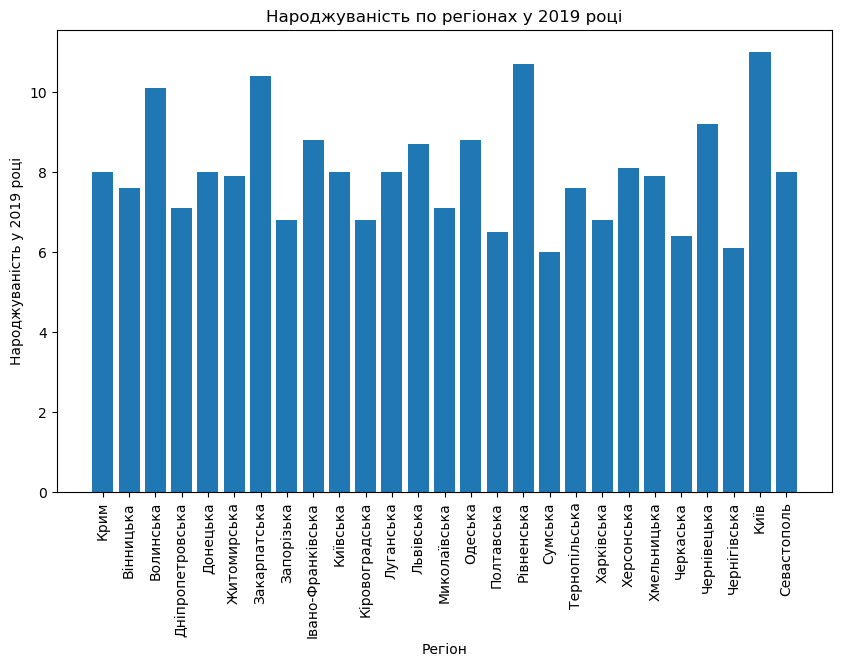

In [14]:
# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(desired_table['Регіон'], desired_table['2019'])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах у 2019 році')
plt.show()

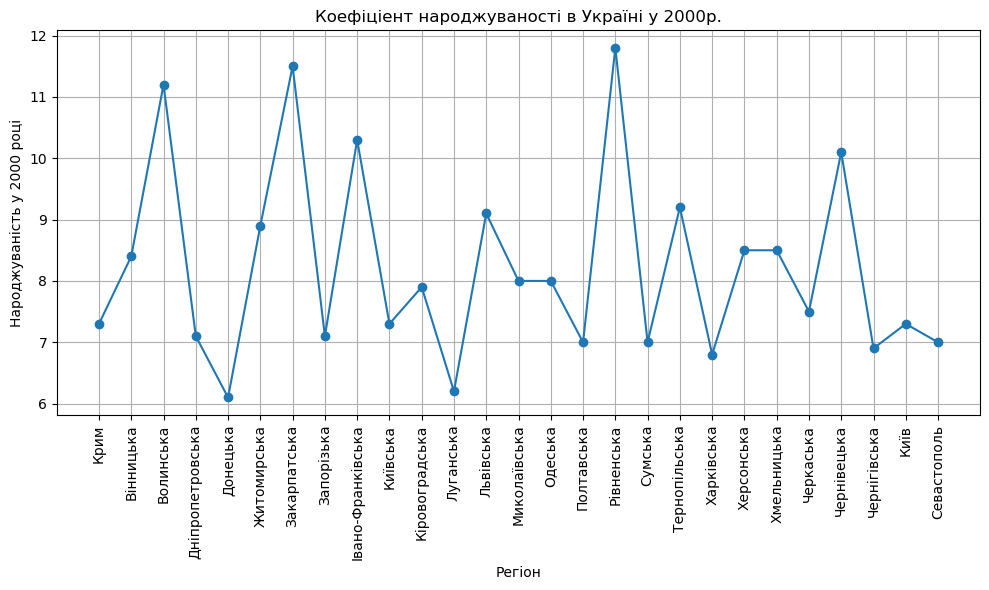

In [22]:
plt.figure(figsize=(10, 6))  
plt.plot(desired_table['Регіон'], desired_table['2000'], marker='o')  
plt.title('Коефіціент народжуваності в Україні у 2000р.')  
plt.xlabel('Регіон')  
plt.ylabel('Народжуваність у 2000 році')  
plt.xticks(rotation=90)  
plt.grid(True)  
plt.tight_layout() 

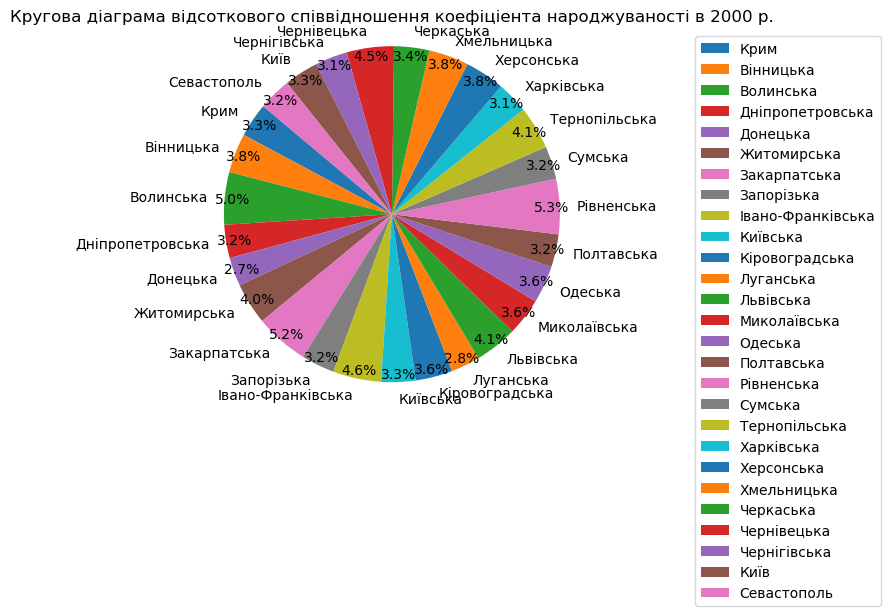

In [29]:
# Заголовок діаграми
plt.title('Кругова діаграма відсоткового співвідношення коефіціента народжуваності в 2000 р.')

# Побудова кругової діаграми
plt.pie(desired_table['2000'], labels=desired_table['Регіон'], autopct='%1.1f%%', startangle=140, pctdistance=0.95)
# Відображення легенди
#plt.legend(loc='best')
plt.legend(loc='best', bbox_to_anchor=(1.5, 1))
# Відображення діаграми
plt.axis('equal')  # Забезпечення кругової форми
plt.show()

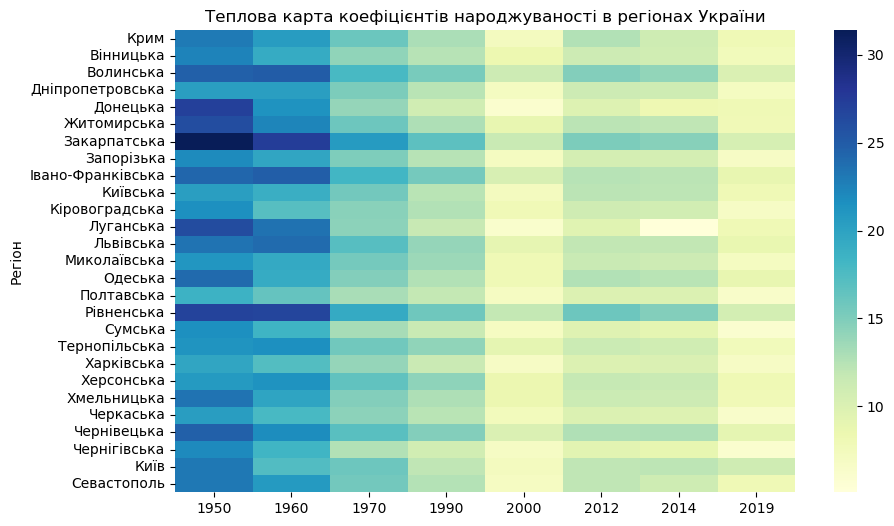

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Створення теплової карти
#sns.heatmap(desired_table.set_index('Регіон'), annot=True, cmap="YlGnBu")
sns.heatmap(desired_table.set_index('Регіон'), annot=False, cmap="YlGnBu")
# Додавання заголовка
plt.title('Теплова карта коефіцієнтів народжуваності в регіонах України')

# Показати графік
plt.show()

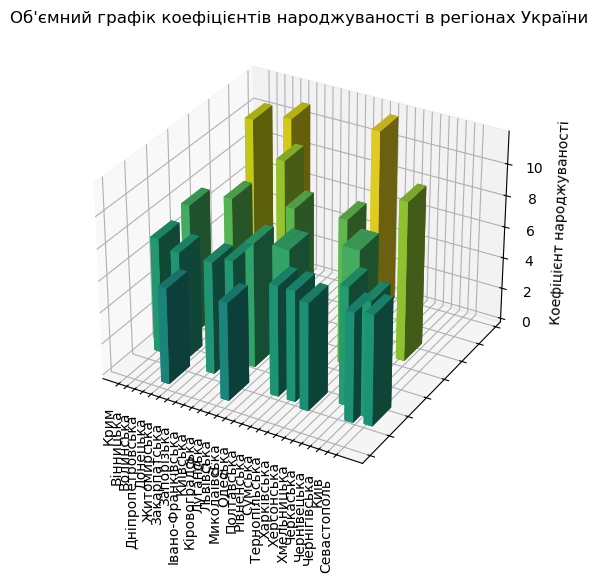

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Створення фігури та області для графіку
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Додавання стовпців об'ємної гістограми
x = range(len(desired_table['Регіон']))
y = desired_table['2000']
z = [0] * len(desired_table['Регіон'])

# Розміри стовпців
dx = [1] * len(desired_table['Регіон'])
dy = [1] * len(desired_table['Регіон'])
dz = desired_table['2000']

colors = plt.cm.viridis(y / float(max(y)))
# Побудова об'ємної гістограми
#ax.bar3d(x, y, z, 1, 1, desired_table['2000'])
ax.bar3d(x, y, z, dx, dy, dz, color=colors)

# Налаштування міток та заголовка
ax.set_xticks(range(len(desired_table['Регіон'])))
ax.set_xticklabels(desired_table['Регіон'], rotation=90)
ax.set_xlabel('Регіон')
ax.set_ylabel('')
ax.set_zlabel('Коефіцієнт народжуваності')
ax.set_yticklabels([])
plt.title('Об\'ємний графік коефіцієнтів народжуваності в регіонах України')

# Показати графік
plt.show()

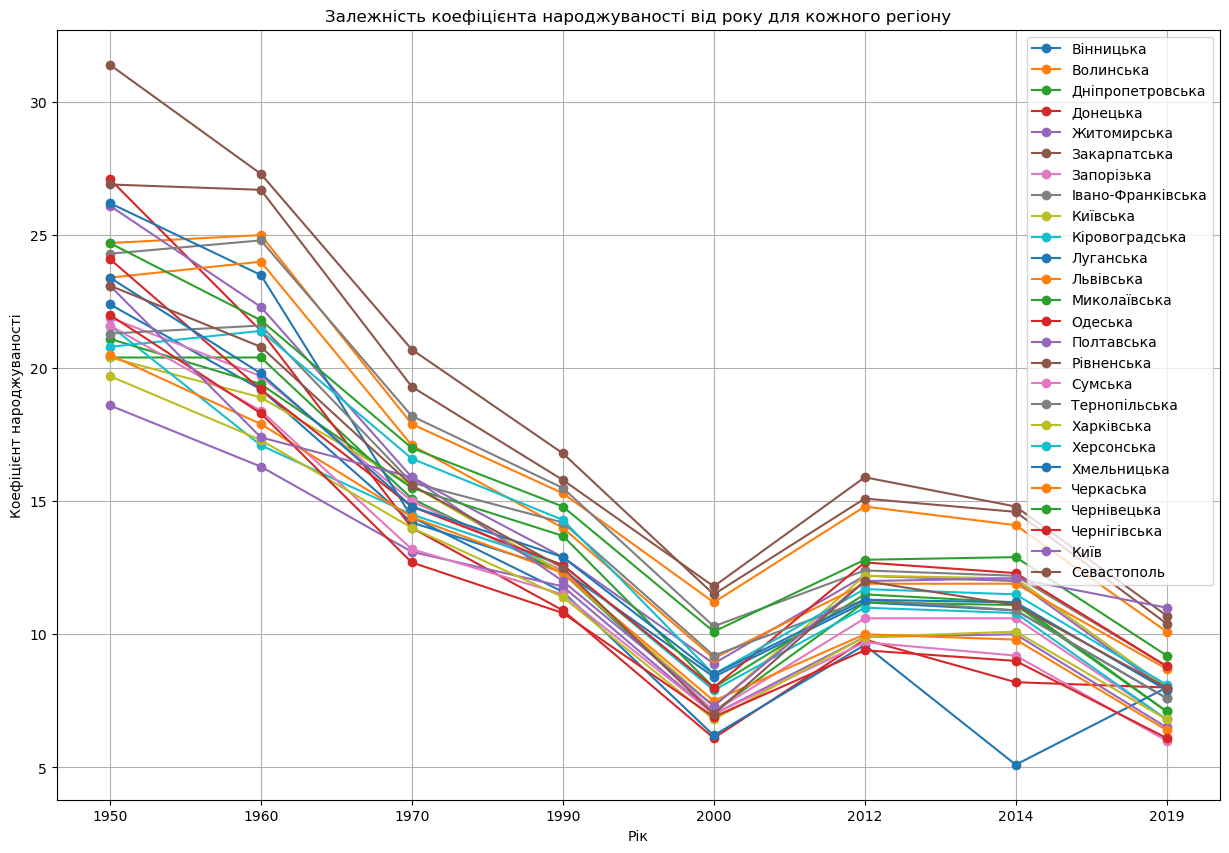

In [58]:
# Створення графіків
plt.figure(figsize=(15, 10))

# Цикл для побудови графіків для кожного регіону
for i in range(1, len(desired_table)):
    region_name = desired_table.iloc[i, 0]  # Назва регіону
    births_coefficient = desired_table.iloc[i, 1:]  # Коефіцієнти народжуваності для кожного року
    years = desired_table.columns[1:]  # Роки
    
    plt.plot(years, births_coefficient, marker='o', label=region_name)  # Побудова графіку
    
# Додавання заголовка та назв вісей
plt.title('Залежність коефіцієнта народжуваності від року для кожного регіону')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')

# Додавання легенди
plt.legend()

# Показати графік
plt.grid(True)
plt.show()

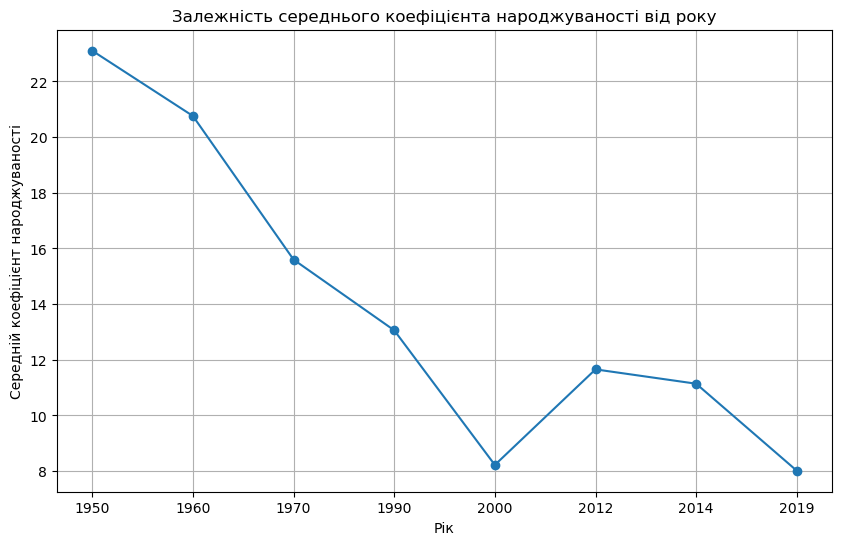

In [59]:
# Обчислення середнього коефіцієнта народжуваності по роках
mean_births_coefficient = desired_table.iloc[:, 1:].mean(axis=0)

# Створення графіка
plt.figure(figsize=(10, 6))

# Побудова графіка залежності середнього коефіцієнта народжуваності від року
plt.plot(desired_table.columns[1:], mean_births_coefficient, marker='o')

# Додавання заголовка та назв вісей
plt.title('Залежність середнього коефіцієнта народжуваності від року')
plt.xlabel('Рік')
plt.ylabel('Середній коефіцієнт народжуваності')

# Показати графік
plt.grid(True)
plt.show()